In [22]:
import numpy as np
import os
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
from keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gc
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
import sklearn
# import seaborn as sns
import tensorflow as tf
from keras import regularizers
# from prettytable import PrettyTable

In [23]:

# # Set the directory path where the text files are located
dir_path = "/Users/sphoorthy/Desktop/Computer-Vision-Lip-Reading-2.0-main/storage"

# Set the dimensions of each frame
height, width, channels = 80, 112, 3

# Initialize arrays to store the video frames and their corresponding labels
videos = []
labels = []
counter = 0
# Loop through each text file and extract the video frames
for root, dirs, files in os.walk(dir_path):


    for file in files:
        if file == "data.txt":

            # Extract the label from the directory name
            label = root.split("/")[-1]
            label = label.split("_")[0]
            #if label not in wanted_words:
            #    continue
            counter += 1
            print(counter, end=" ")


            with open(os.path.join(root, file), 'r') as f:
                data_str = f.read()

            # Evaluate the contents of the text file as a Python expression
            data_list = eval(data_str)

            # Convert the list to a numpy array
            data_array = np.array(data_list)
            #print(data_array.shape)

            # Reshape the data into a 4D array of shape (num_frames, height, width, channels)
            num_frames = len(data_list)
            frames = data_array.reshape((num_frames, height, width, channels))
            # Append the frames and label to the videos and labels arrays
            videos.append(frames)
            labels.append(label)
print(labels)

#Convert the videos and labels arrays to NumPy arrays
videos = np.array(videos)
labels = np.array(labels)

# Save the videos and labels as separate .npy files
np.save("videosCorrect.npy", videos)
np.save("labelsCorrect.npy", labels)

#
#
# videos = np.load('/Computer-Vision-Lip-Reading-2.0-main/collected_data/videos.npy')
# labels = np.load('/kaggle/input/better-lip-reading/labelsCorrect.npy')


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [39]:
videos = np.load('videosCorrect.npy')
labels = np.load('labelsCorrect.npy')

In [40]:
# Print the shape of the videos and labels arrays
print("Videos shape:", videos.shape)
print("Labels shape:", labels.shape)

Videos shape: (427, 22, 80, 112, 3)
Labels shape: (427,)


In [41]:
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
labels = encoded_labels

In [42]:
# label_dict = {0: 'demo',  1: 'lips', 2: 'open', 3: 'webex', 4: 'zoom', 5: 'play', 6: 'song', 7: 'cat', 8: 'dog'}
label_dict = { 0: 'algorithm',  1: 'apple', 2: 'box', 3:'computer', 4:'cricket', 5:'data', 6:'facebook', 7:'fox', 8:'friend', 9: 'glass', 10: 'guitar', 11:'idea', 12: 'laptop', 13: 'movie', 14: 'pencil', 15: 'piano', 16: 'youtube'}
# label_dict = { 0: 'lips',  2: 'demo',  1: 'bye'}

In [43]:
print(labels)

[ 8 10 11 11  7 11  0 10 11  8  0 11  7 11  8 15  9  9 15 15 15  9 15 15
  9 11  7  0 11  7 11  8 11  0 10  7 11  8 11 10  0 15  9 15 15  9 15  9
 15 15  9  8  8  9  8  8  5  3 12  5 12 12  3  2  5 12  5  3 12  2  5  3
 12  2  5 12  8  8  8  9  0  9  8 12  3 12  2  5  5  3  5 12  3  2 12  5
 12  5  3  5 16  4  6  6  4  3  6  4 16  1  3  1  4 14  7  6  0  2  6  0
  7 14  2  7 11  0  6 14  7  7 14  0 11  7  6  2  3  1  6  4 16  1 16  3
  4 16  4  6  3  0  6 11  8  7  6  7 14  7 11  0  6  7 14  6  0  7  2  6
  0 14  7  2 10 15 10  5 15 10  5 10 10  5 10 13 13 16 13 16 13 14 16 13
 13 13  4 16 13 14  4  5 10 10 10 15 10  5 10 15 16 13 14  4 14 16 13 13
 13  4 13 16 13 13 16 15 15 15  9 15  9 11  0 10  0 11  7 11  8  7 10 11
  8 15  9 15  9 15 15 10  7 11  8  7 11  8 11 10  0  0 10 11  3  5 12  3
  3 12  5  3  2  5 12  3 12  2  5  8  9  8  9  8  8  8  9  8  3  2  5 12
  3 12  2  5  3 12  3  5  3  5 12  8  9  8  8  8  7  9  8  8  6  0  7 14
  2 14  7  6  0  2  0 11  7  0  6 14  2 11  2  0  6

In [44]:
print(videos)

[[[[[130 127 151]
    [128 126 150]
    [124 120 146]
    ...
    [ 69  74 107]
    [ 74  80 110]
    [ 75  82 111]]

   [[136 134 159]
    [135 132 158]
    [130 127 154]
    ...
    [ 71  76 109]
    [ 76  82 113]
    [ 77  84 114]]

   [[149 149 178]
    [149 147 177]
    [145 143 174]
    ...
    [ 74  79 114]
    [ 80  86 118]
    [ 82  89 120]]

   ...

   [[227 224 224]
    [224 221 221]
    [215 212 215]
    ...
    [ 92  94 122]
    [ 97  99 127]
    [ 99 101 128]]

   [[227 224 224]
    [224 221 222]
    [216 213 217]
    ...
    [ 98 101 130]
    [103 105 133]
    [104 106 134]]

   [[227 224 224]
    [224 221 223]
    [217 213 217]
    ...
    [101 104 133]
    [105 107 136]
    [106 107 136]]]


  [[[128 131 152]
    [126 128 149]
    [120 122 144]
    ...
    [ 51  58  91]
    [ 59  65  98]
    [ 63  68 102]]

   [[133 136 158]
    [131 134 155]
    [126 129 151]
    ...
    [ 51  58  92]
    [ 59  66 100]
    [ 63  69 103]]

   [[143 149 170]
    [142 147 169]
    [140 1

In [45]:
# Split the data into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(videos, labels, test_size=0.2, random_state=42)

X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)




Training set shape: (341, 22, 80, 112, 3) (341,)
Test set shape: (43, 22, 80, 112, 3) (43,)


In [46]:
# Get the unique classes
classes = np.unique(labels)

# Count the number of occurrences of each class
counts = np.bincount(labels, minlength=len(classes))

# Find the maximum length of the class names for alignment
max_len = max([len(label_dict[i]) for i in range(len(label_dict))])

# Print the distribution of classes
for i, count in enumerate(counts):
    class_name = label_dict[i].ljust(max_len)
    print("{}  {} counts".format(class_name, count))

algorithm  30 counts
apple      5 counts
box        22 counts
computer   27 counts
cricket    20 counts
data       30 counts
facebook   26 counts
fox        30 counts
friend     30 counts
glass      20 counts
guitar     28 counts
idea       30 counts
laptop     20 counts
movie      27 counts
pencil     24 counts
piano      30 counts
youtube    28 counts


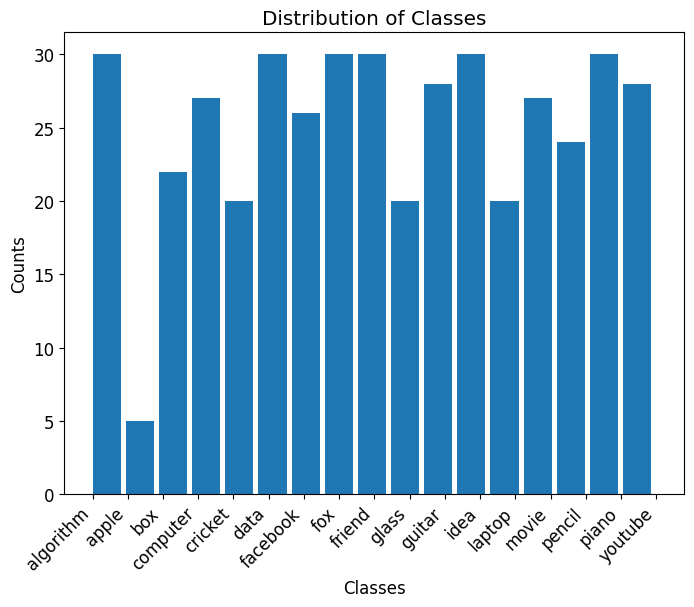

In [47]:
# Get the unique classes
classes = np.unique(labels)

# Count the number of occurrences of each class
counts = np.bincount(labels, minlength=len(classes))

# Set the figure size and font size
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})

# Plot the histogram
plt.hist(labels, bins=len(classes), width=0.8)
plt.xticks(range(len(classes)), [label_dict[i] for i in range(len(classes))], rotation=45, ha='right')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Distribution of Classes')

# Display the plot
plt.show()

In [48]:
input_shape = (22, 80, 112, 3)

model = Sequential()
model.add(Conv3D(8, (3, 3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling3D((2, 2, 2)))
model.add(Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling3D((2, 2, 2)))
model.add(Conv3D(256, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_dict), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert the target labels to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)
y_valid_onehot = tf.keras.utils.to_categorical(y_valid)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_3 (Conv3D)           (None, 20, 78, 110, 8)    656       
                                                                 
 max_pooling3d_2 (MaxPoolin  (None, 10, 39, 55, 8)     0         
 g3D)                                                            
                                                                 
 conv3d_4 (Conv3D)           (None, 8, 37, 53, 32)     6944      
                                                                 
 max_pooling3d_3 (MaxPoolin  (None, 4, 18, 26, 32)     0         
 g3D)                                                            
                                                                 
 conv3d_5 (Conv3D)           (None, 2, 16, 24, 256)    221440    
                                                                 
 flatten_1 (Flatten)         (None, 196608)           

In [49]:
# Train the model and record the history of training
history = model.fit(X_train, y_train_onehot, epochs=20, batch_size=16, validation_data=(X_test, y_test_onehot))

Epoch 1/20
22/22 [==============================] - 63s 3s/step - loss: 123.4948 - accuracy: 0.0469 - val_loss: 2.9035 - val_accuracy: 0.0000e+00
Epoch 2/20
22/22 [==============================] - 58s 3s/step - loss: 2.9019 - accuracy: 0.0674 - val_loss: 2.9031 - val_accuracy: 0.0233
Epoch 3/20
22/22 [==============================] - 67s 3s/step - loss: 2.8966 - accuracy: 0.0762 - val_loss: 2.9012 - val_accuracy: 0.0000e+00
Epoch 4/20
22/22 [==============================] - 59s 3s/step - loss: 2.8941 - accuracy: 0.0587 - val_loss: 2.9001 - val_accuracy: 0.0465
Epoch 5/20
22/22 [==============================] - 62s 3s/step - loss: 2.8943 - accuracy: 0.0704 - val_loss: 2.8990 - val_accuracy: 0.0465
Epoch 6/20
 5/22 [=====>........................] - ETA: 47s - loss: 2.8885 - accuracy: 0.0875

KeyboardInterrupt: 

In [15]:
test_loss, test_acc = model.evaluate(X_test,  y_test_onehot, verbose=2)
print('\nTest accuracy:', test_acc)


1/1 - 0s - loss: 0.0707 - accuracy: 1.0000 - 238ms/epoch - 238ms/step

Test accuracy: 1.0


NameError: name 'preds' is not defined

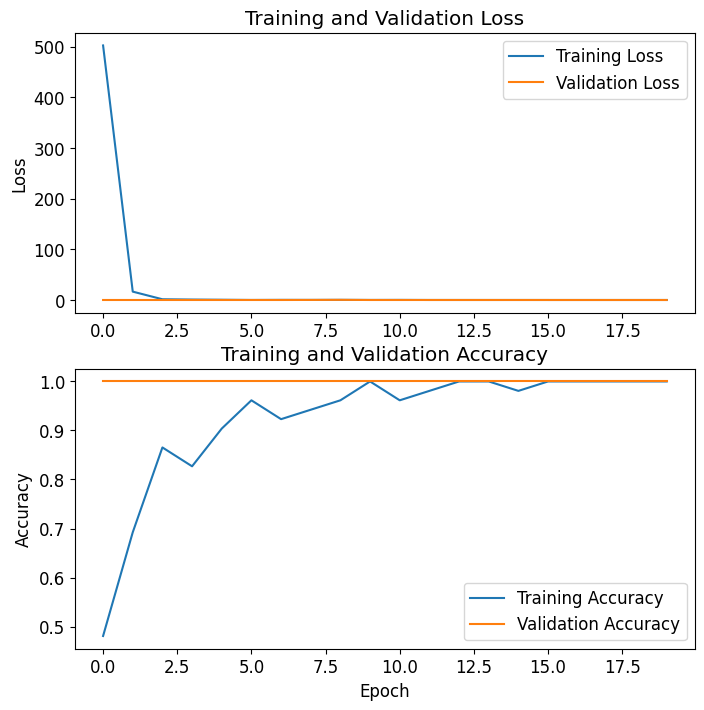

In [16]:

# Plot the training and validation loss and accuracy
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].legend(loc='upper right')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss')

axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].legend(loc='lower right')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training and Validation Accuracy')

plt.xlabel('Epoch')
plt.show()

In [17]:
model.save_weights('model_weights8.h5')

In [18]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

1/1 [==============================] - 0s 251ms/step


NameError: name 'PrettyTable' is not defined

In [19]:
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred))

Balanced accuracy: 1.0


In [21]:
# Convert y_true and y_pred to one-hot encoding
n_classes = len(np.unique(y_test))
y_true_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_bin = model.predict(X_test)
y_pred_bin = label_binarize(np.argmax(y_pred_bin, axis=1), classes=np.arange(n_classes))

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curves
plt.figure(figsize=(8,6))
lw = 2
colors = ['blue', 'red', 'green', 'orange', 'purple', 'black', 'brown', 'magenta', 'gray', 'maroon', 'navy', 'olive', 'pink']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
             label='ROC curve of {0} (AUC = {1:0.2f})'
             ''.format(label_dict[i], roc_auc[i]))
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=lw,
         label='micro-average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc_micro))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

1/1 [==============================] - 0s 231ms/step


IndexError: index 1 is out of bounds for axis 1 with size 1

NameError: name 'sns' is not defined